####Ejercicio Extra
Los 21 distritos de Madrid y las distintas poblaciones de la Comunidad tienen una Tasa de Incidencia Acumulada del COVID-19 en los últimos 15 días de un determinado valor. Cada semana la Comunidad de Madrid pubblica dichos datos en formato csv en el Portal de Datos Abiertos.

Los datos se encuentran en la dirección: https://datos.comunidad.madrid/catalogo/dataset/7da43feb-8d4d-47e0-abd5-3d022d29d09e/resource/f22c3f43-c5d0-41a4-96dc-719214d56968/download/covid19_tia_muni_y_distritos_s.csv

Haz un estudio de la evolución de de la tasa de incidencia de los distritos y municipios que la semana del 27 de octubre en casos confirmados 14 días pertenecieran al decil más alto.

Haz un gráfico temporal por mes o semana de los casos confirmados totales.

Sientete libre para realizar cualquier tipo de estudio del dataset para comentar tus conocimientos

Nota puedes hacerlo tanto en R como Python[[1]](#1)

[1]: Recomendación: hazlo en los dos

In [1]:
##Carga de librerías

import pandas as pd
import seaborn as sns
import numpy as np
import datetime

In [2]:
# Carga del fichero
DF = pd.read_csv('https://datos.comunidad.madrid/catalogo/dataset/7da43feb-8d4d-47e0-abd5-3d022d29d09e/resource/f22c3f43-c5d0-41a4-96dc-719214d56968/download/covid19_tia_muni_y_distritos_s.csv',sep=';',encoding='mbcs')

In [3]:
#Creo el campo `FI1`, transformando la fecha de str a Date
DF['FI1'] =pd.to_datetime(DF['fecha_informe']).dt.date


# Transformo el campo `tasa_incidencia_acumulada_ultimos_14dias` en numerico, para ello reemplazo las `,` por `.`
DF['tasa_incidencia_acumulada_ultimos_14dias'] = DF['tasa_incidencia_acumulada_ultimos_14dias'].str.replace(',','.')
DF['tasa_incidencia_acumulada_ultimos_14dias'] = DF['tasa_incidencia_acumulada_ultimos_14dias'].astype('float')
DF['fecha_informe'].dtypes

dtype('O')

In [4]:
# hago un nuevo dataframe y renombro las columnas para que sea más fácil de manipular
NewDF= DF[['municipio_distrito','tasa_incidencia_acumulada_ultimos_14dias','FI1']]
NewDF.rename(columns={'municipio_distrito':'MD','tasa_incidencia_acumulada_ultimos_14dias':'TIA14'},inplace=True)
NewDF.dtypes

c:\users\jd\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


MD        object
TIA14    float64
FI1       object
dtype: object

In [6]:
# Calculo el decil 10
decil10 = np.percentile(NewDF.loc[NewDF['FI1']==datetime.date(2020, 10, 27),'TIA14'],90)
decil10

618.7380000000003

In [6]:
## Extraigo la lista de distritos que incluye el decil
MDDecil10 = NewDF.loc[(NewDF['FI1']==datetime.date(2020, 10, 27))&(NewDF['TIA14']>=decil10),['MD']]
NewDF.loc[(NewDF['FI1']==datetime.date(2020, 10, 27))&(NewDF['TIA14']>=decil10),['MD','TIA14']].sort_values(by='TIA14')

,MD,TIA14
1149,Torrelaguna,630.25
1186,Cervera de Buitrago,666.67
1139,Colmenar de Oreja,684.76
1143,Titulcia,685.45
1065,Talamanca de Jarama,700.03
1167,Majadahonda,715.62
1099,Guadarrama,817.12
1092,Villamanrique de Tajo,853.49
1113,Estremera,873.02
1178,Brea de Tajo,954.20


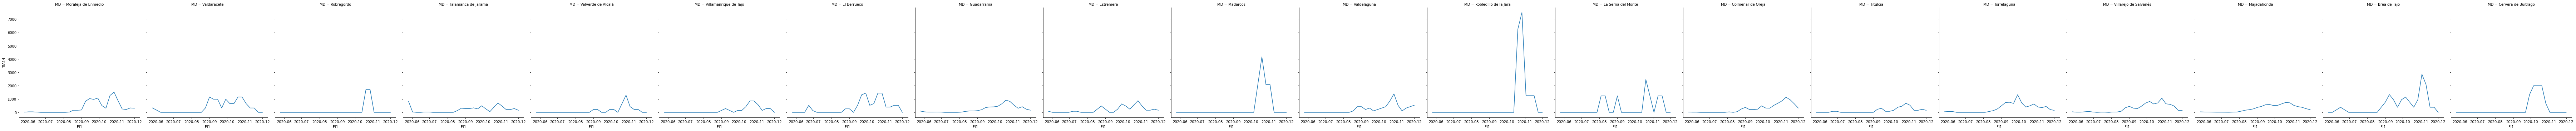

In [7]:
sns.relplot(data = NewDF[NewDF['MD'].isin(MDDecil10['MD'])],y= 'TIA14',x='FI1',col='MD',kind='line',)

In [8]:
MDDecil10

,MD
1020,Moraleja de Enmedio
1021,Valdaracete
1040,Robregordo
1065,Talamanca de Jarama
1086,Valverde de Alcalá
1092,Villamanrique de Tajo
1096,El Berrueco
1099,Guadarrama
1113,Estremera
1116,Madarcos
